# CLUSTERING ANALYSIS 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope

In [10]:
# Load dataset
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\eastwestairlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [16]:
# Fill missing values with the mean of the column
data['Balance'] = data['Balance'].fillna(data['Balance'].mean())

In [18]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [32]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)


In [26]:
# Remove outliers
envelope = EllipticEnvelope(contamination=0.05)
outliers = envelope.fit_predict(data_imputed)
data_cleaned = data_imputed[outliers == 1]
data_cleaned

array([[1.0000e+00, 2.8143e+04, 0.0000e+00, ..., 0.0000e+00, 7.0000e+03,
        0.0000e+00],
       [2.0000e+00, 1.9244e+04, 0.0000e+00, ..., 0.0000e+00, 6.9680e+03,
        0.0000e+00],
       [3.0000e+00, 4.1354e+04, 0.0000e+00, ..., 0.0000e+00, 7.0340e+03,
        0.0000e+00],
       ...,
       [4.0190e+03, 7.3597e+04, 0.0000e+00, ..., 0.0000e+00, 1.4020e+03,
        1.0000e+00],
       [4.0200e+03, 5.4899e+04, 0.0000e+00, ..., 1.0000e+00, 1.4010e+03,
        0.0000e+00],
       [4.0210e+03, 3.0160e+03, 0.0000e+00, ..., 0.0000e+00, 1.3980e+03,
        0.0000e+00]])

In [30]:
# Scale features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)
data_scaled

array([[-1.74432509, -0.46016429, -0.17027852, ..., -0.4276756 ,
         1.40539584, -0.73819846],
       [-1.74346136, -0.56085617, -0.17027852, ..., -0.4276756 ,
         1.38986975, -0.73819846],
       [-1.74259763, -0.3106823 , -0.17027852, ..., -0.4276756 ,
         1.4218923 , -0.73819846],
       ...,
       [ 1.72613971,  0.05414611, -0.17027852, ..., -0.4276756 ,
        -1.31069907,  1.35464926],
       [ 1.72700344, -0.1574211 , -0.17027852, ...,  0.13277269,
        -1.31118426, -0.73819846],
       [ 1.72786717, -0.74447541, -0.17027852, ..., -0.4276756 ,
        -1.31263983, -0.73819846]])

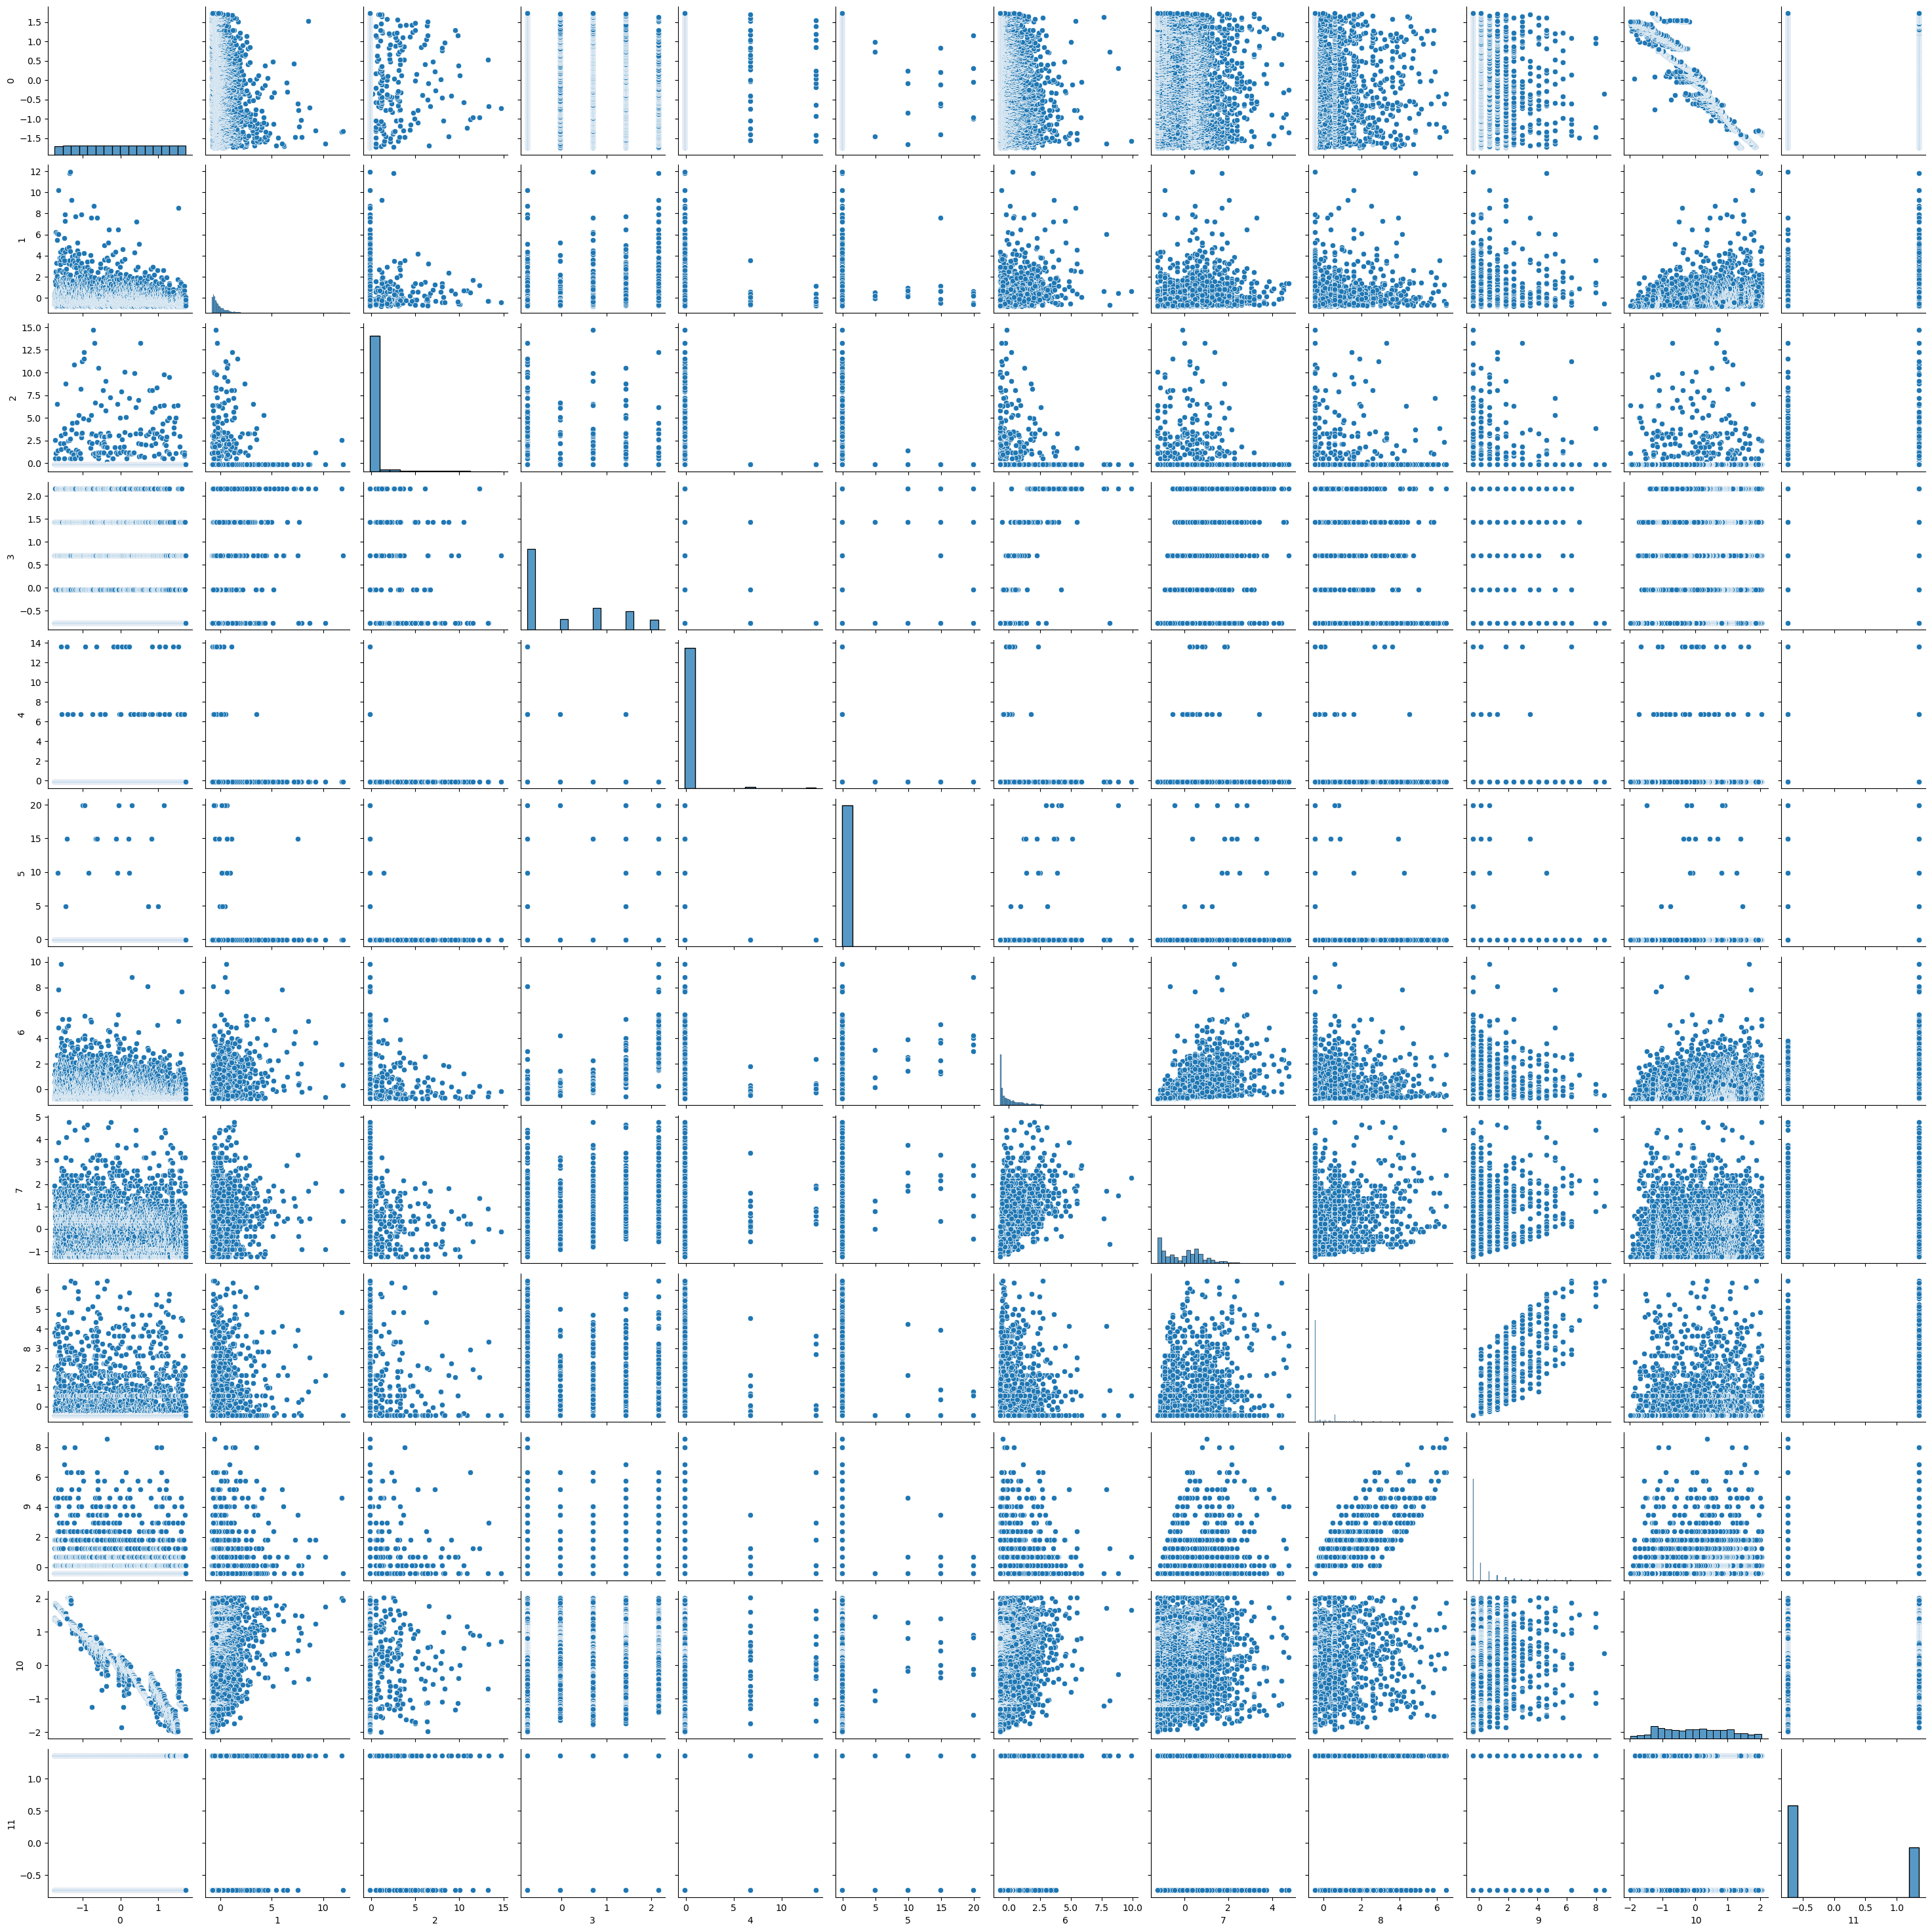

In [35]:
# Exploratory Data Analysis (EDA)
sns.pairplot(pd.DataFrame(data_scaled))
plt.show()

## Implementing Clustering Algorithms:

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [46]:
# K-Means
k_values = range(1, 11)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

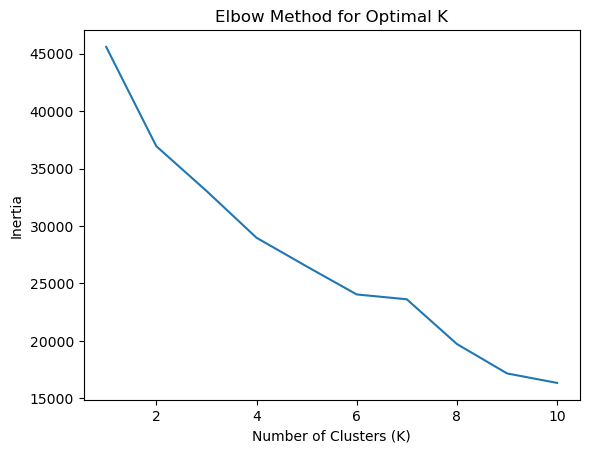

In [44]:
# Plot Elbow Curve
plt.plot(k_values, inertia)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [50]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)
hierarchical_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
dbscan_labels

array([ 0,  0,  0, ..., -1, 27,  0], dtype=int64)

In [58]:
# Cluster Analysis and Interpretation
# K-Means Clusters
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_labels

array([1, 1, 1, ..., 0, 0, 0])

In [60]:
# Analyze clusters
print("K-Means Cluster Centers:\n", kmeans.cluster_centers_)
print("Silhouette Score for K-Means:", silhouette_score(data_scaled, kmeans_labels))

K-Means Cluster Centers:
 [[ 0.95815609 -0.3376867  -0.03374103 -0.45333976  0.01055958 -0.05456847
  -0.42846207 -0.35177857 -0.20689216 -0.19805004 -0.94272162 -0.3067118 ]
 [-0.79649445 -0.15080769 -0.07104443 -0.40228171  0.00988655 -0.06068069
  -0.41612345 -0.29722982 -0.16510121 -0.16019841  0.77883471 -0.17167816]
 [-0.41836649  0.76634221  0.15685365  1.31539702 -0.03137979  0.17591506
   1.29472651  0.99929834  0.5737941   0.55235965  0.41855368  0.74582083]]
Silhouette Score for K-Means: 0.19554361519646316


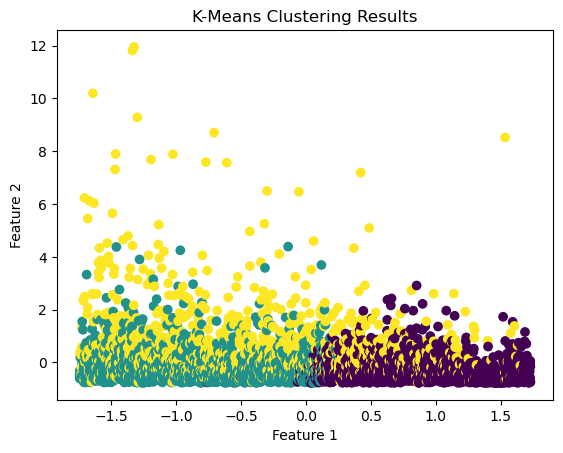

In [62]:
# Visualization
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [64]:
# Evaluate DBSCAN
print("Silhouette Score for DBSCAN:", silhouette_score(data_scaled, dbscan_labels))

Silhouette Score for DBSCAN: -0.38335409651714625
